<a href="https://colab.research.google.com/github/waelrash1/predictive_analytics_DT302/blob/main/Lab_tree_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Tree-based Methods**

- [8.1.1 Regression Trees](#8.1.1-Regression-Trees)
- [8.1.2 Classification Trees](#8.1.2-Classification-Trees)
- [Lab: 8.3.1 Fitting Classification Trees](#8.3.1-Fitting-Classification-Trees)
- [Lab: 8.3.2 Fitting Regression Trees](#8.3.2-Fitting-Regression-Trees)
- [Lab: 8.3.3 Bagging and Random Forests](#8.3.3-Bagging-and-Random-Forests)
- [Lab: 8.3.4 Boosting](#8.3.4-Boosting)

In [90]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error ,mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

<ipython-input-90-ff20621b20d0>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

### 8.1.1 Regression Trees

In R, I exported the dataset from package 'ISLR' to a csv file.

In [3]:
url='https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv'
df = pd.read_csv(url).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

Text(0.5, 0, 'Log(Salary)')

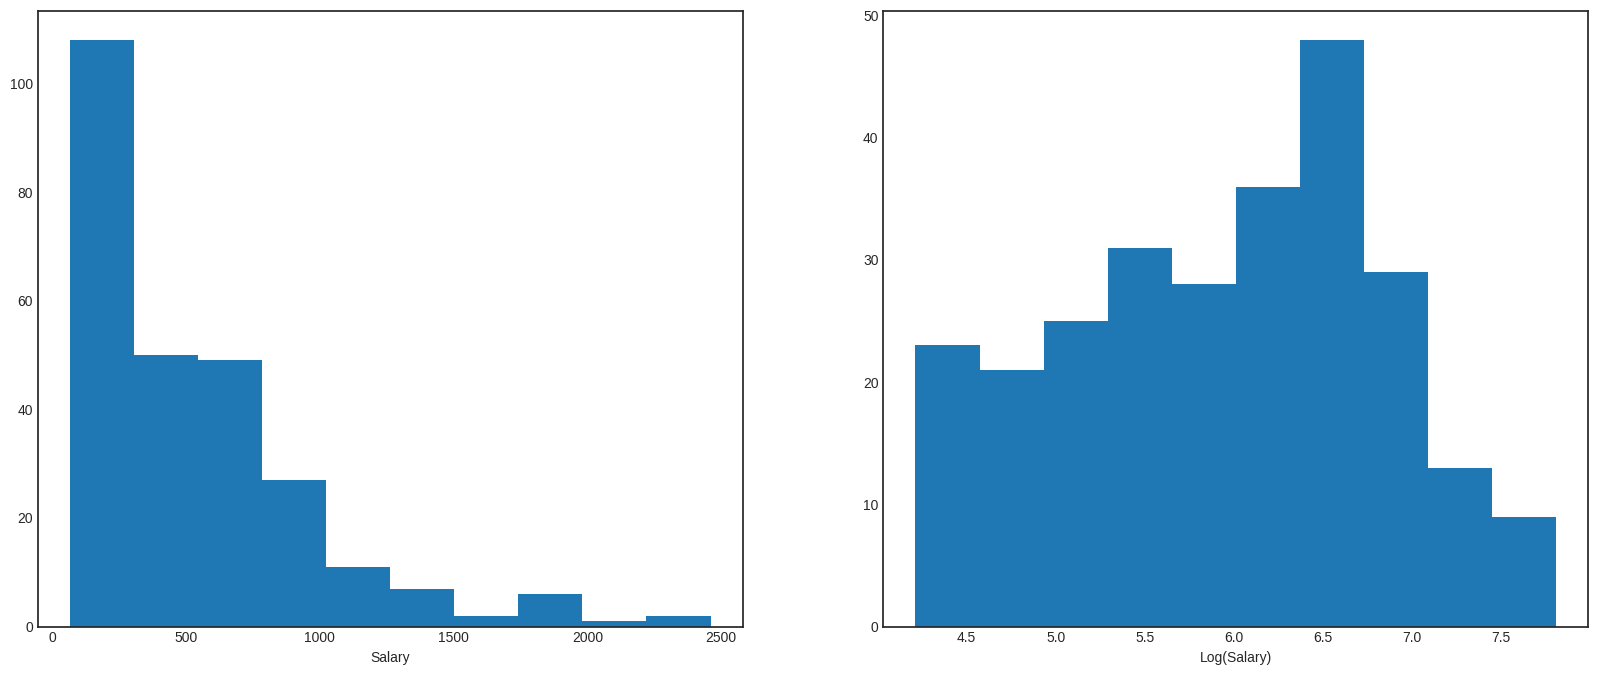

In [4]:
X = df[['Years', 'Hits']]
y = np.log(df.Salary)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(df.Salary)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)')

This Python code is performing the following steps:

### 1. **Defining Features (`X`) and Target (`y`)**:
- `X = df[['Years', 'Hits']]`:
  - This line extracts two features from the DataFrame `df`: **Years** and **Hits**.
  - These will be used as the input features for the model (explanatory variables).

- `y = np.log(df.Salary)`:
  - This line creates the target variable `y`, which is the **logarithm of the Salary**.
  - Taking the logarithm of a target variable like Salary is a common transformation to:
    - Handle **skewed distributions**.
    - **Normalize** the data for better performance in regression models.
    - Reduce the impact of outliers, especially when the data contains a wide range of salaries.

### 2. **Plotting the Histograms**:
- `fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))`:
  - This line creates a **figure** with two subplots (side-by-side) using `matplotlib`.
  - `figsize=(20, 8)` defines the size of the entire figure (width 20, height 8).

- **First Subplot (ax1)**:
  - `ax1.hist(df.Salary)`:
    - This line plots a **histogram** of the original Salary values.
    - A histogram shows the frequency distribution of Salary data, giving insight into its spread, skewness, and range.
  - `ax1.set_xlabel('Salary')`:
    - This sets the label of the x-axis as **"Salary"** for the first subplot.

- **Second Subplot (ax2)**:
  - `ax2.hist(y)`:
    - This line plots a **histogram** of the logarithm of Salary (`y`).
    - This will show how the Salary distribution changes after taking the logarithm, and it typically helps to make a right-skewed distribution more normal (symmetrical).
  - `ax2.set_xlabel('Log(Salary)')`:
    - This sets the label of the x-axis as **"Log(Salary)"** for the second subplot.

### Key Points:
- **Raw Salary**: The original Salary distribution might be **right-skewed**, meaning most salaries are on the lower end, with a few very high salaries (outliers).
- **Log-Transformed Salary**: Taking the log of the Salary tends to **compress the larger values** and **spread out the smaller values**, making the distribution more **normal** or symmetric. This can be useful for regression modeling because many algorithms perform better with normally distributed data.

The histograms in the two subplots help visualize the difference in distributions before and after applying the log transformation. This is often a critical step to improve model performance, especially in regression tasks where the target variable has a wide range or is heavily skewed.

In [5]:
tree_model = DecisionTreeRegressor(max_leaf_nodes=5)
tree_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=5)

### Graph Decision Tree

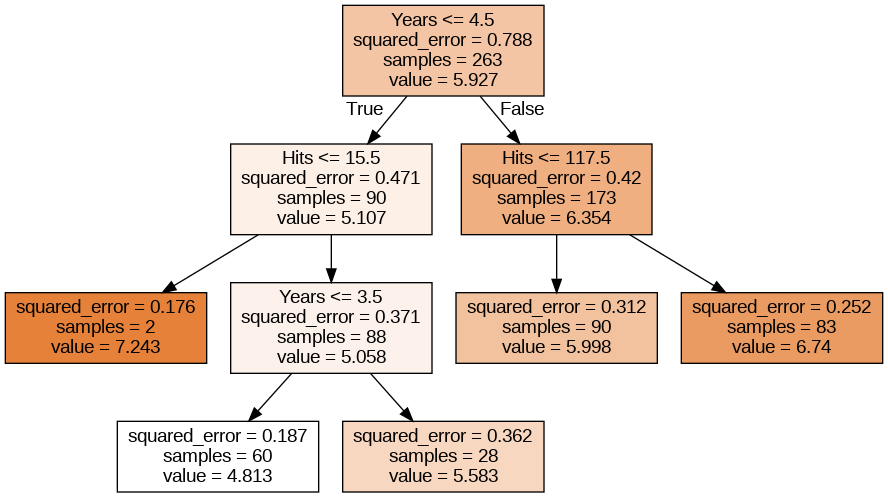

In [6]:
graph, = print_tree(tree_model, features=['Years', 'Hits'])
Image(graph.create_png())

This image represents a **regression decision tree**, where the goal is to predict a continuous value based on input features. Here’s an explanation of the components and structure of the tree:

### 1. **Splits and Features**
- At each **split node**, the decision tree checks a condition on a feature to divide the dataset into two parts:
  - For example, the first split checks if **Years <= 4.5**, dividing the data into those with fewer or equal to 4.5 years of experience (True) and those with more than 4.5 years (False).
  
### 2. **Squared Error**
- Each node shows the **squared error**, which is a measure of how well the current split explains the data. A lower squared error indicates a better fit of the data.
  - For example, at the root node (first split), the squared error is **0.788**, which indicates the error associated with predicting the value without splitting the data.
  - As the tree grows, the squared error decreases because the splits partition the data into more homogeneous groups.
  
### 3. **Samples**
- The **samples** indicate how many data points are present at each node.
  - At the root node, there are **263 samples**.
  - After the first split, the left child (True branch) has **90 samples**, and the right child (False branch) has **173 samples**.

### 4. **Value**
- The **value** is the predicted output (mean target value) at that node.
  - At the root, the predicted value is **5.927**.
  - After each split, the value changes based on the samples in that branch.

### 5. **Leaf Nodes**
- The tree’s **leaf nodes** are the terminal nodes where no further splitting is done. Each leaf node represents the final predicted value for that group of samples. The goal is to minimize the squared error within each leaf.
  - For instance, one leaf node at the bottom left has a squared error of **0.176**, and its predicted value for those 2 samples is **7.243**.

### Example of Decision Path:
- If a sample has **Years = 3** and **Hits = 10**, it will follow the left branches of the tree:
  - It passes the first split (**Years <= 4.5**) → goes to the left branch.
  - It passes the second split (**Hits <= 15.5**) → goes to the left branch again.
  - Finally, it passes the third split (**Years <= 3.5**) → ends in a leaf with a predicted value of **7.243**.

### Key Points:
- The decision tree splits the data based on feature conditions to minimize the squared error at each step.
- The **squared error** indicates the fit of the tree; lower squared error values mean the model better fits the data.
- The **leaf nodes** give final predictions for subsets of the data based on the conditions from the splits.

Let me know if you need further details on specific aspects of the tree!

###  Figure 8.2

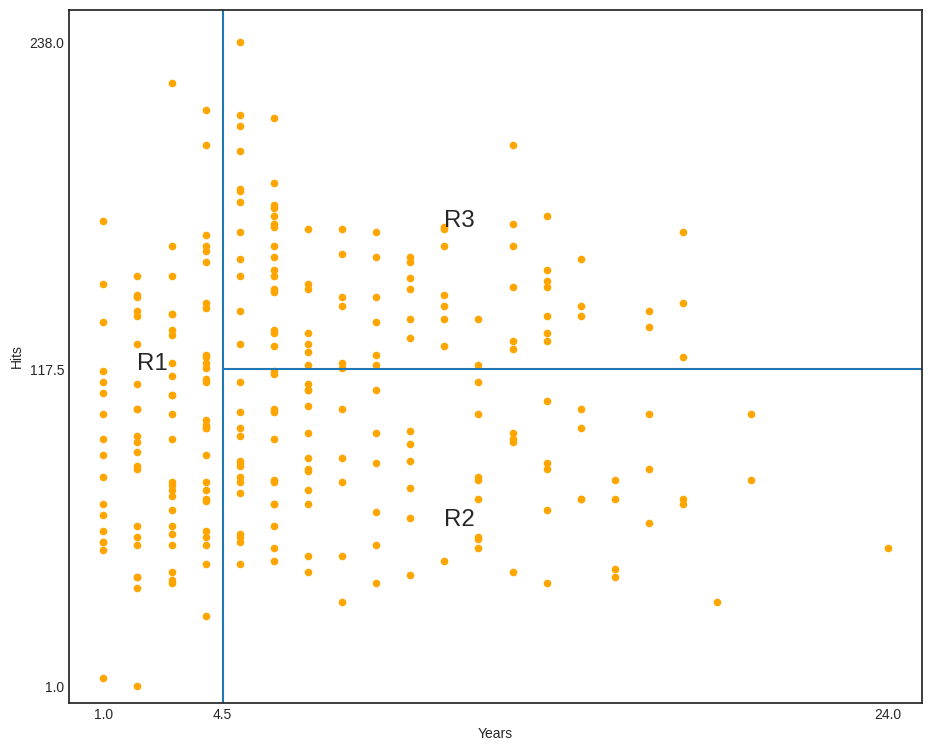

In [7]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(11,9))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

### Pruning
This is currently not supported in scikit-learn. See first point under 'disadvantages of decision trees in the <A href='http://scikit-learn.github.io/dev/modules/tree.html#'>documentation</A>. Implementation has been <A href='https://github.com/scikit-learn/scikit-learn/pull/941'>discussed</A> but Random Forests have better predictive qualities than a single pruned tree anyway if I understand correctly.
    

### 8.1.2 Classification Trees Heart dataset

Dataset available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [8]:
url='https://raw.githubusercontent.com/rashida048/Datasets/master/Heart.csv'
df2 = pd.read_csv(url).drop('Unnamed: 0', axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [ ]:
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [9]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]



```python
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]
```

perform the following:

1. **`pd.factorize()`**: This function converts categorical values (like strings) into **numerical codes** (integers). It assigns a unique integer to each unique category in the column.

2. **`df2.ChestPain = pd.factorize(df2.ChestPain)[0]`**:
   - It converts the **`ChestPain`** column in `df2` from categorical to integer codes, where each unique chest pain type gets a unique integer.
   - The `[0]` extracts just the factorized codes (not the mapping of categories).

3. **`df2.Thal = pd.factorize(df2.Thal)[0]`**:
   - Similarly, it converts the **`Thal`** column from categorical values to integer codes.

### Purpose:
- This is a way to **encode categorical variables** into numeric values, which is required for many machine learning algorithms that only work with numerical data.

In [ ]:
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,No
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,No
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,No


In [10]:
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]

In [11]:
DT_classifier = DecisionTreeClassifier(max_depth=None, criterion='entropy',max_leaf_nodes=6, max_features=3, random_state=1)
DT_classifier.fit(X2,y2)

DecisionTreeClassifier(criterion='entropy', max_features=3, max_leaf_nodes=6,
                       random_state=1)

In [12]:
DT_classifier.score(X2,y2)

0.7474747474747475

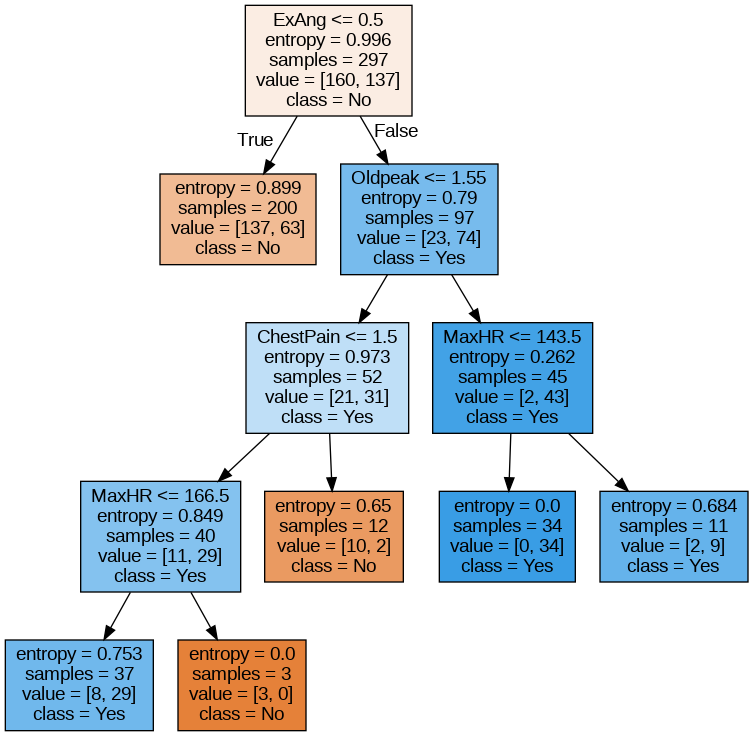

In [13]:
graph2, = print_tree(DT_classifier, features=X2.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())

### 8.3.1 Fitting Classification Trees on Carseats datasets

In [14]:
url='https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv'
df3 = pd.read_csv(url)
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  High         400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [ ]:
df3.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [44]:
X = df3.drop(['Sales', 'High'], axis=1)
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
classification_model = DecisionTreeClassifier(max_depth=4)
classification_model.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [46]:
print(classification_report(y, classification_model.predict(X)))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       236
           1       0.89      0.56      0.69       164

    accuracy                           0.79       400
   macro avg       0.83      0.76      0.77       400
weighted avg       0.81      0.79      0.78       400



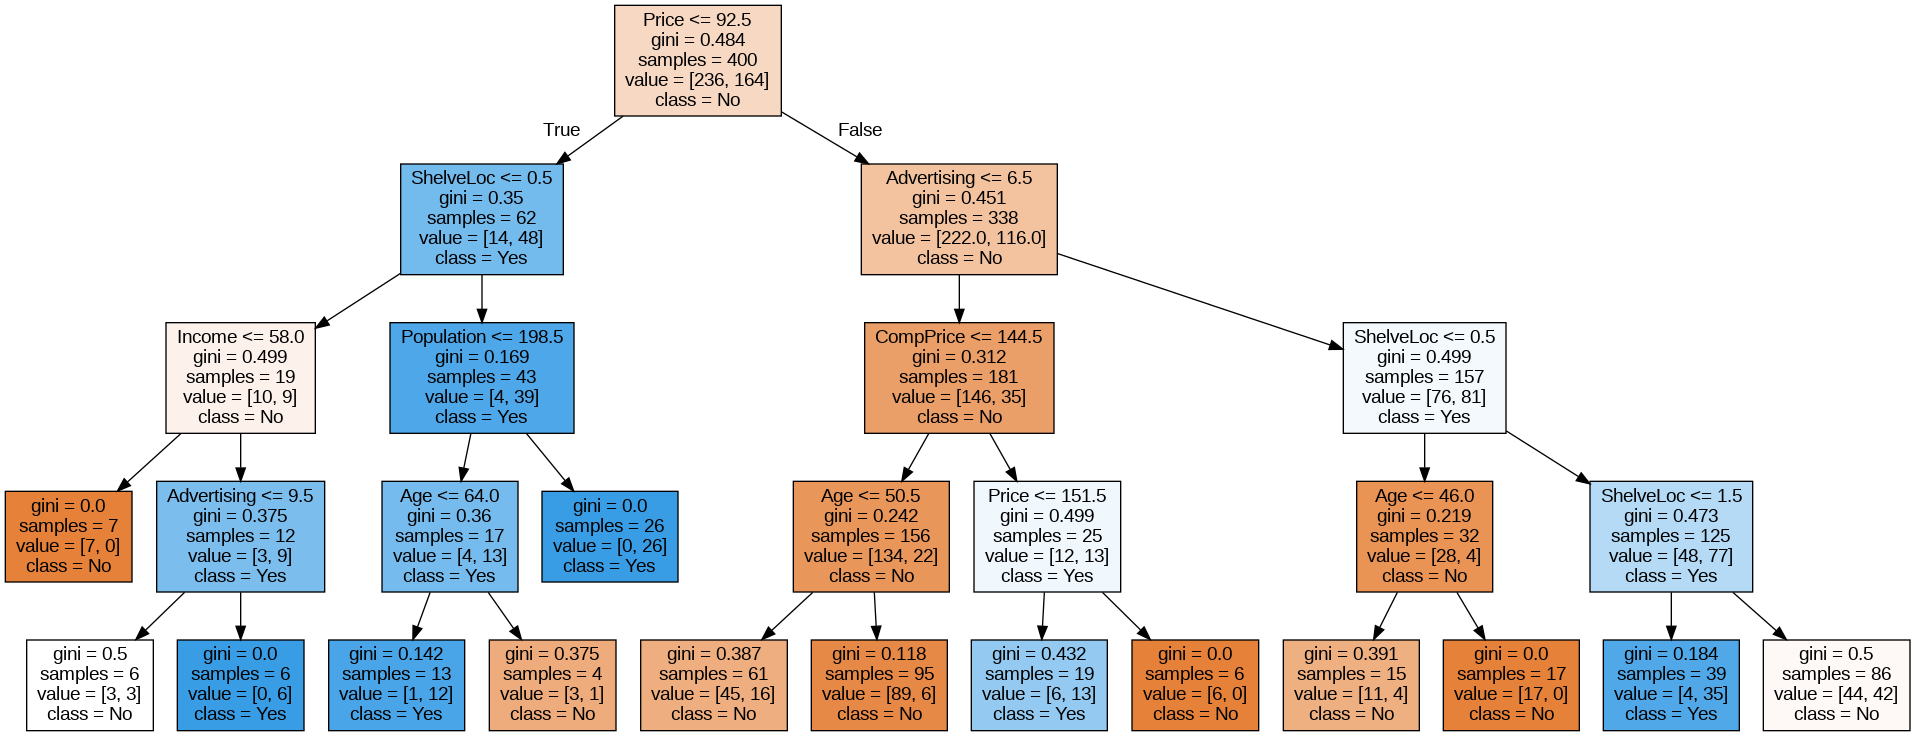

In [47]:
graph3, = print_tree(classification_model, features=X.columns, class_names=['No', 'Yes'])
Image(graph3.create_png())

In [48]:
classification_model.fit(X_train, y_train)
pred = classification_model.predict(X_test)

In [50]:
# weighted Precision of the model using test data is 701%
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.76        43
           1       0.76      0.51      0.61        37

    accuracy                           0.70        80
   macro avg       0.72      0.69      0.68        80
weighted avg       0.71      0.70      0.69        80



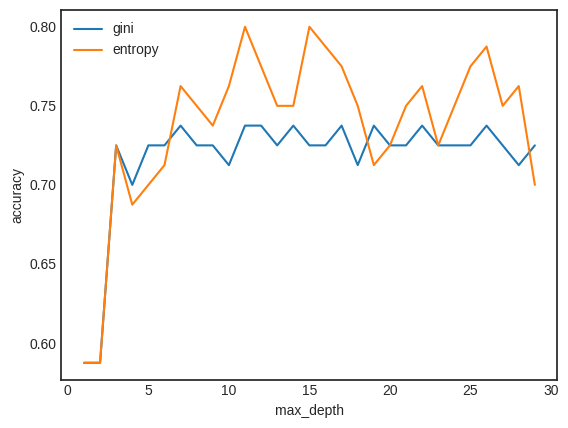

In [64]:
from sklearn.metrics import accuracy_score
max_depth = []
acc_gini = []
acc_entropy = []
np.random.seed(42)
for i in range(1,30):

 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

The image depicts a plot comparing the **accuracy** of two decision tree classifiers using different **criteria**—**Gini** and **Entropy**—across various values of **max_depth** (depth of the tree).

### Key Components:
1. **x-axis (max_depth)**:
   - This represents the **maximum depth** of the decision tree, which controls how deep the tree can grow. A higher depth allows the tree to fit more complex patterns in the data but risks overfitting.

2. **y-axis (accuracy)**:
   - This shows the **accuracy** of the decision tree on a validation or test set, indicating how well the model predicts the correct labels.

3. **Gini (blue line)**:
   - The blue line represents the decision tree’s accuracy when using the **Gini index** as the splitting criterion.
   - The Gini index measures the impurity of a node and attempts to split data in a way that maximizes homogeneity within the branches.

4. **Entropy (orange line)**:
   - The orange line represents the accuracy when using **entropy** (information gain) as the splitting criterion.
   - Entropy measures the uncertainty in the data and aims to reduce this uncertainty by splitting on attributes that provide the highest information gain.

### Observations:
- **Both lines fluctuate** as the depth increases, indicating that accuracy can vary significantly with tree depth for both criteria.
- **At lower depths** (e.g., between 0 and 5), the performance of both Gini and Entropy improves, but Gini starts with slightly lower accuracy.
- **At mid-depths** (e.g., 10-20), accuracy tends to fluctuate more, showing that the model is sensitive to changes in depth and potentially overfitting at deeper levels.
- **At higher depths** (e.g., beyond 20), the entropy criterion appears to maintain higher peaks in accuracy compared to Gini, but with more variation, indicating more instability.

### Summary:
- **Entropy** generally produces higher accuracy at deeper tree depths but may also lead to more fluctuations, indicating higher sensitivity to changes in depth.
- **Gini** appears more stable but doesn’t consistently outperform entropy at greater depths.

This comparison helps to understand which splitting criterion might work better for your data and how tree depth influences model performance.

In [81]:
np.random.seed(42)
classification_model = DecisionTreeClassifier(max_depth=12,criterion='entropy' )
classification_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [82]:
pred = classification_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        43
           1       0.77      0.65      0.71        37

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.74        80
weighted avg       0.75      0.75      0.75        80



### 8.3.2 Fitting Regression Trees on Boston hoursing dataset

In [83]:
url='https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv'
boston_df = pd.read_csv(url)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  506 non-null    int64  
 1   crim      506 non-null    float64
 2   zn        506 non-null    float64
 3   indus     506 non-null    float64
 4   chas      506 non-null    int64  
 5   nox       506 non-null    float64
 6   rm        506 non-null    float64
 7   age       506 non-null    float64
 8   dis       506 non-null    float64
 9   rad       506 non-null    int64  
 10  tax       506 non-null    int64  
 11  ptratio   506 non-null    float64
 12  black     506 non-null    float64
 13  lstat     506 non-null    float64
 14  medv      506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [84]:
y = boston_df.medv
X = boston_df.drop('medv', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [100]:
# Pruning not supported. Choosing max depth 3)
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

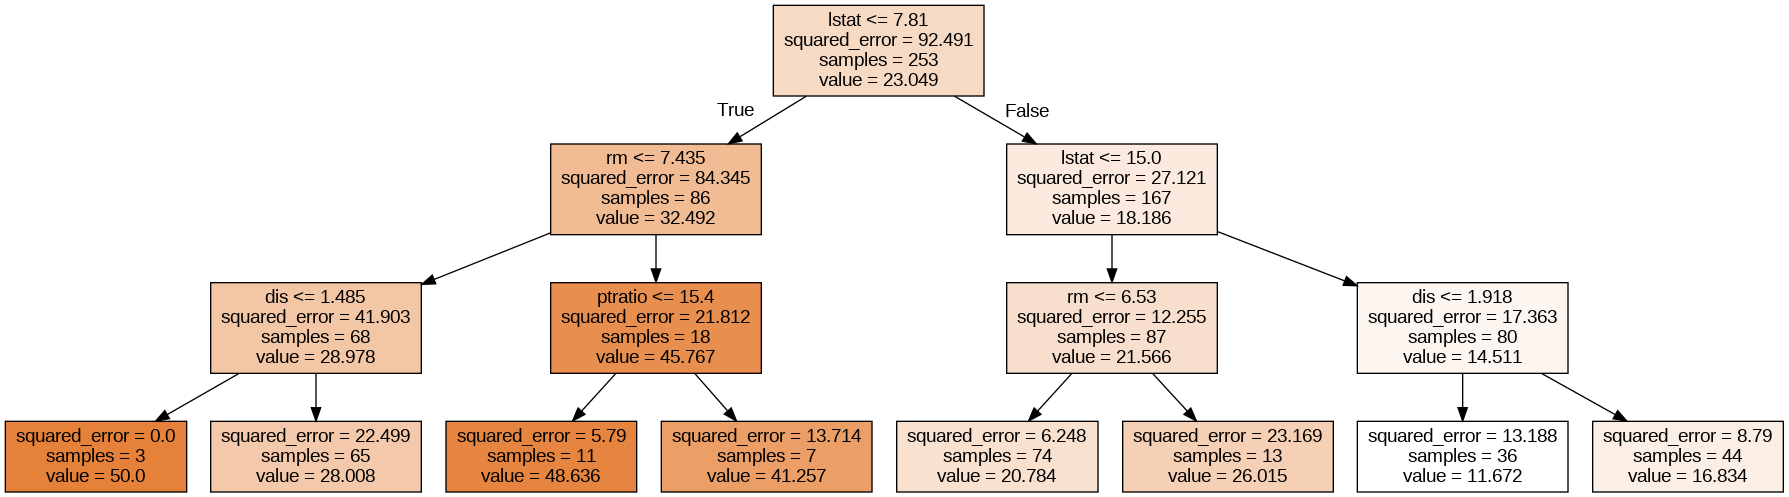

In [86]:
graph, = print_tree(regr2, features=X.columns)
Image(graph.create_png())

Text(0, 0.5, 'y_test')

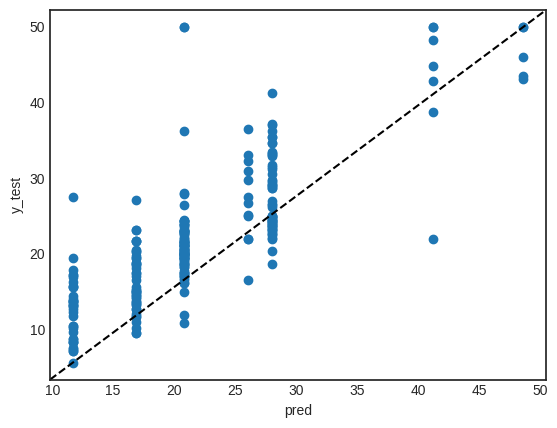

In [101]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [102]:
print('DT Mean Sq Error.',mean_squared_error(y_test, pred))

print('DT Root Mean Sq Error.', root_mean_squared_error (y_test, pred))

DT Mean Sq Error. 26.023230850097445
DT Root Mean Sq Error. 5.101296977249751


### 8.3.3 Bagging and Random Forests

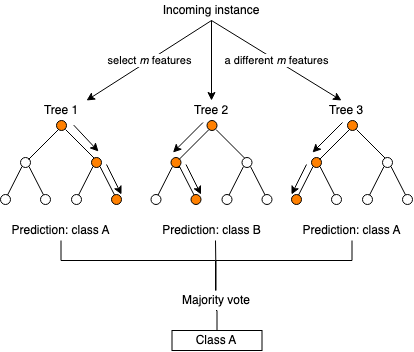

In [92]:
# There are 13 features in the dataset
X.shape

(506, 14)

In [93]:
# Bagging: using all features
rf = RandomForestRegressor(max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

Text(0, 0.5, 'y_test')

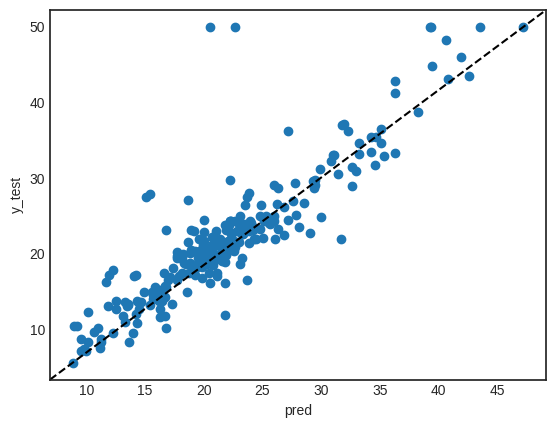

In [104]:
pred = rf.predict(X_test)
#pred_prob=rf.predict_proba(test)[:, 1]

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [98]:
print('RF Mean Sq Error.',mean_squared_error(y_test, pred))

print('RF Root Mean Sq Error.', root_mean_squared_error (y_test, pred))

RF Mean Sq Error. 16.038496221343873
RF Root Mean Sq Error. 4.004809136693517


In [111]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=42)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=42)

In [112]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

15.30708728853755

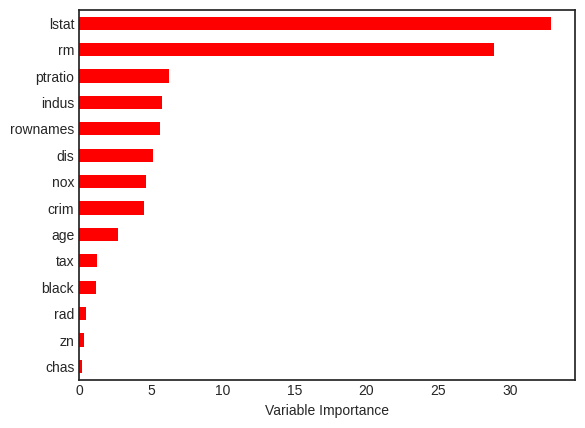

In [113]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

We will try adjusting the following set of hyperparameters:
* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

## Hyperparameter optimisation

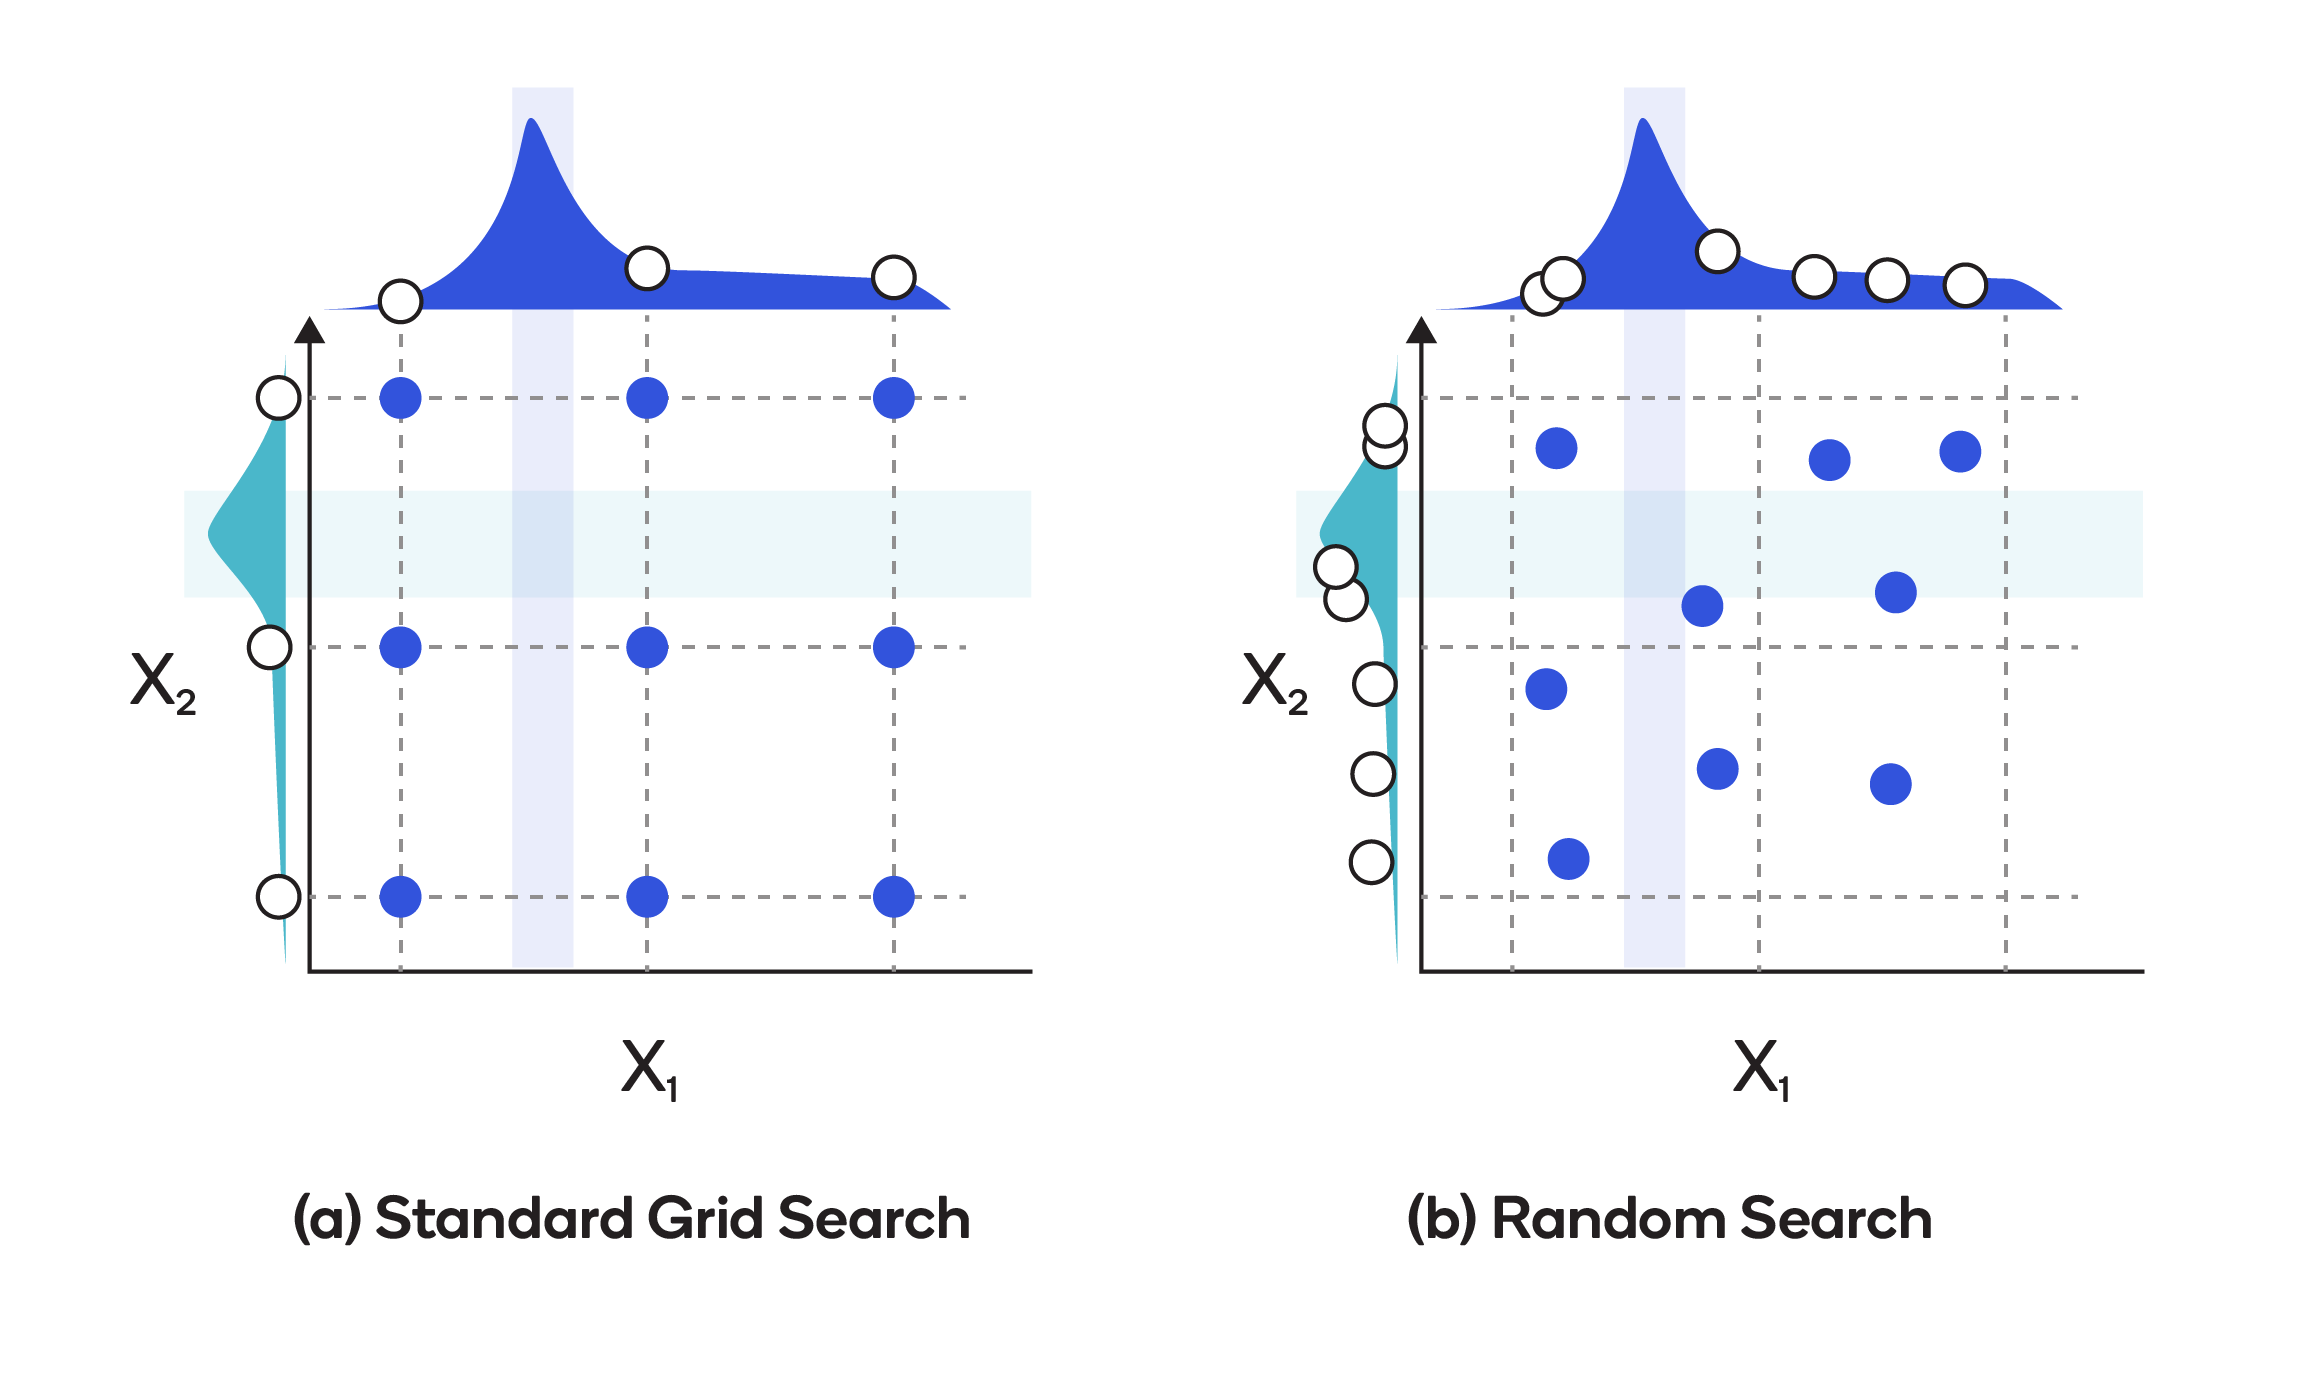## Random Hyperparameter Grid
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

This image illustrates the difference between **Standard Grid Search** (left) and **Random Search** (right) for hyperparameter tuning in machine learning.

### (a) **Standard Grid Search**:
- **Grid search** evaluates the model by exhaustively testing **all combinations** of specified hyperparameters.
- In the diagram, the grid shows all the possible combinations of `X1` (horizontal axis) and `X2` (vertical axis) values.
- Blue circles represent the chosen points where the model will be evaluated.
- **Limitations**:
  - It can be inefficient, especially when certain regions of the grid don't yield much improvement.
  - If one dimension (e.g., `X1`) contributes more to the model’s performance, grid search could still waste resources evaluating irrelevant combinations.

### (b) **Random Search**:
- **Random search** randomly selects a subset of hyperparameter combinations to evaluate.
- The diagram shows randomly scattered blue points representing randomly selected combinations of `X1` and `X2`.
- **Advantages**:
  - More **efficient** than grid search, especially when not all hyperparameter values are equally important.
  - Allows the algorithm to explore the hyperparameter space more flexibly, often finding optimal values quicker.

### Summary:
- **Grid Search**: Tests all possible combinations systematically but can be computationally expensive.
- **Random Search**: Tests a random subset of hyperparameters, often more efficient for discovering good combinations.

In [124]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Switch to regressor for continuous targets
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for random search
random_grid = {
    'n_estimators': np.linspace(100, 1000, num=5, dtype=int).tolist(),  # Number of trees in random forest
    'max_features': ['sqrt', 'log2', None],  # Valid options for max_features
    'max_depth': np.linspace(5, 50, num=10, dtype=int).tolist() + [None],  # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [2, 4],  # Min samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Output the created hyperparameter grid
print(f"Random search grid: {random_grid}")

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Perform random search on hyperparameters, using 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model to your data
# random_search.fit(X_train, y_train)  # Uncomment and use with appropriate data



Random search grid: {'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 4], 'bootstrap': [True, False]}


On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 5 * 11 * 3 * 2 * 2 * 10 = 6600 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [123]:
random_search.fit(X_train, y_train)  # Uncomment this when data is available


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 550,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 45,
 'bootstrap': False}

In [119]:
best_random = rf_random.best_estimator_
#grid_accuracy = evaluate(best_grid, X_test, y_test)
pred = best_random.predict(X_test)
mean_squared_error(y_test, pred)
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

16.441233182754047

## Grid Search with Cross Validation
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

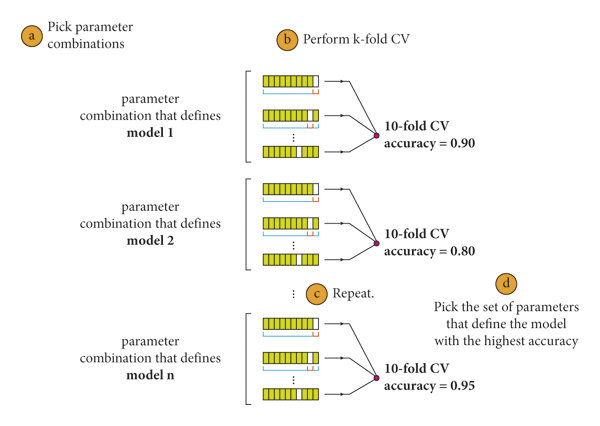

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid based on the random search results or manual selection
param_grid = {
    'bootstrap': [False],  # Only False bootstrap in this grid
    'max_depth': [6, 8, 12],  # Maximum depth of trees
    'max_features': ['sqrt'],  # Number of features to consider at each split
    'min_samples_leaf': [2, 4, 5],  # Minimum samples required at each leaf node
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'n_estimators': [200, 500, 1000]  # Number of trees in the forest
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)  # Adding random_state for reproducibility

# Instantiate the grid search model with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Optionally, fit the model on your training data (you would need to define X_train and y_train)
# grid_search.fit(X_train, y_train)  # Uncomment and use appropriate data


In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'bootstrap': False,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=500)

### Best RF model

In [ ]:
best_grid = grid_search.best_estimator_
pred = best_grid.predict(X_test)
mean_squared_error(y_test, pred)


16.9359178440799

### 8.3.4 Boosting

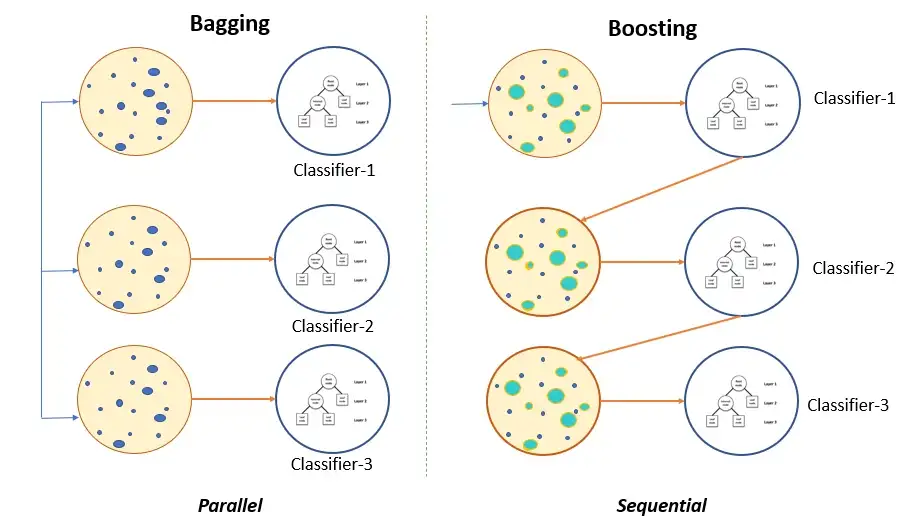

# Boosting

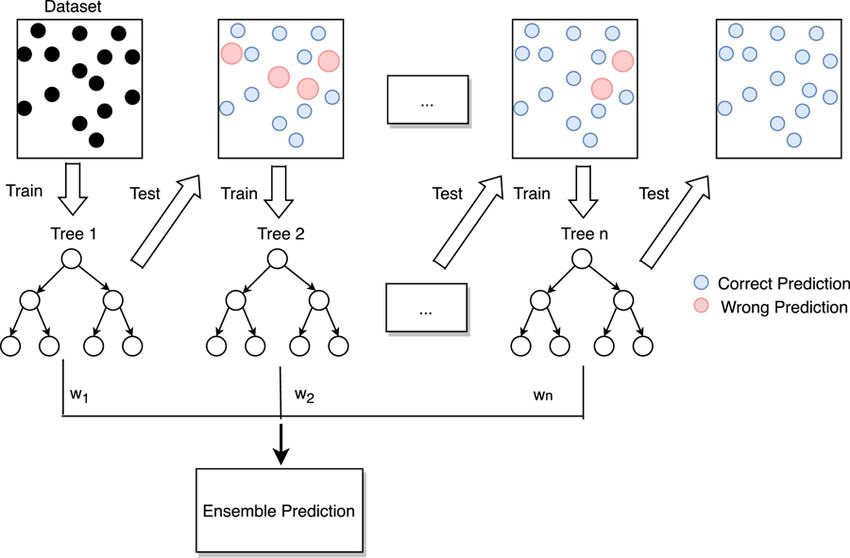

In [ ]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

zn          0.013059
chas        0.121257
rad         0.153199
black       0.460309
indus       0.576559
nox         0.731767
age         0.922677
tax         1.098078
crim        2.799589
ptratio     4.370389
dis         5.896297
rm         27.934202
lstat      54.922618
dtype: float64


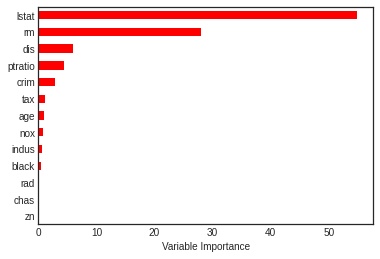

In [ ]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
mean_squared_error(y_test, regr.predict(X_test))

15.592155779633027